## Ejemplo de Knn

Vamos a utilizar el dataset iris de scikit-learn y el clasificador KNeighborsClassifier, vamos a ver qué predice knn utilizando el conjunto completo de datos con las 3 clases (Setosa (0), Versicolor(1), Virginica(2))


In [69]:
import numpy as np
from sklearn.datasets import load_iris 
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import  KNeighborsClassifier 
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt 

In [70]:
iris = load_iris(as_frame=True) #iris es un objeto de tipo diccionario (Bunch), propio de sklearn, lo convertimos a DataFrame
X_iris = iris.data #características
y_iris = iris.target  #columna objetivo

print(X_iris.shape, y_iris.shape) 
X_iris.head()

(150, 4) (150,)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [71]:
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)

Podríamos haber utilizado:

X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42, stratify=y)

utilizando stratify aseguramos que la proporción de las clases en el conjunto de entrenamiento sea igual a la proporción de clases en el conjunto de prueba, si no, la división es aleatoria y puede que se escojan valores que no sean representativos de las proporciones en el conjunto original

In [72]:
knn = KNeighborsClassifier(n_neighbors=6)    #así indico el número de vecinos que voy a utilizar
knn.fit(X_train, y_train)  
knn.score(X_test, y_test)  #precisión del modelo 

1.0

Score representa (función para modelo knn):
- kNN para clasificación: devuelve la precisión (accuracy: porcentaje de predicciones correctas, en rango de 0 a 1) en los datos de prueba
- kNN para regresión: coeficiente de determinación : indica qué también se ajustan las predicciones del modelo a los valores reales del conjunto de prueba

Ahora ya podemos empezar a predecir

In [73]:
# Puedo crear yo un dato nuevo pero en ese caso para conocer la precisión tendría que conocer el valor real, no sirve para la general obviamente
valores=[[6,4,4,0.1]]  #lista de valores que voy a utilizar para la predicción
X_nuevo=np.array(valores).reshape(1, -1) 
"""convierto la lista a numpy : 1:numero de muestras, -1 que calcule numpy las columnas necesarias... reshape(filas,columnas)"""
print(X_nuevo)
#y predecir con él

y_pred1 = knn.predict(X_nuevo)

print(y_pred1)

[[6.  4.  4.  0.1]]
[1]


c:\Users\Usuario\Desktop\mientorno\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [74]:
#utilizo los datos que ya tenía para pruebas
y_pred2 = knn.predict(X_test)
y_pred2

#podemos también usar predict_proba para tener las probabilidades de clase
#probabilidades = knn.predict_proba(X_test)
#print(probabilidades[:10]) 

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

Vamos a evaluar con accuracy_score() no está asociada a un modelo específico, es una función general

In [75]:
#Y así puedo evaluar la precisión del modelo
accuracy = accuracy_score(y_test, y_pred2)
print(f'Precisión del clasificador k-NN con todas las clases: {accuracy:.2f}')

Precisión del clasificador k-NN con todas las clases: 1.00


Comprobamos overfitting y underfitting

Vamos a crear una matriz de vecinos hasta 12 e ir comprobando cómo va variando la precisión según varía k

Iremos ajustando el modelo a los datos de entrenamiento y viendo resultados

In [76]:
# Crear vecinos
neighbors = np.arange(1,13)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
  	# escogemos KNN Classifier
	knn = KNeighborsClassifier(neighbor)
	# Fit the model
	knn.fit(X_train, y_train)
  
	# Calcular accuracy
	train_accuracies[neighbor] = knn.score(X_train, y_train)
	test_accuracies[neighbor] = knn.score(X_test, y_test) 
print(neighbors, '\n', train_accuracies, '\n', test_accuracies)

[ 1  2  3  4  5  6  7  8  9 10 11 12] 
 {np.int64(1): 1.0, np.int64(2): 0.9666666666666667, np.int64(3): 0.95, np.int64(4): 0.9583333333333334, np.int64(5): 0.9666666666666667, np.int64(6): 0.9666666666666667, np.int64(7): 0.975, np.int64(8): 0.9583333333333334, np.int64(9): 0.9666666666666667, np.int64(10): 0.9833333333333333, np.int64(11): 0.9583333333333334, np.int64(12): 0.975} 
 {np.int64(1): 1.0, np.int64(2): 1.0, np.int64(3): 1.0, np.int64(4): 1.0, np.int64(5): 1.0, np.int64(6): 1.0, np.int64(7): 0.9666666666666667, np.int64(8): 1.0, np.int64(9): 1.0, np.int64(10): 1.0, np.int64(11): 1.0, np.int64(12): 1.0}


Vamos a verlo en un gráfico, con una curva de complejidad del modelo para ver cómo cambia el rendimiento a medida que el modelo se hace menos complejo.

- k grande = modelo menos complejo =puede causar underfitting
- k pequeño= modelo más complejo= puede llevar a overfitting

La fase de test nos dice cómo generaliza el modelo en datos no vistos


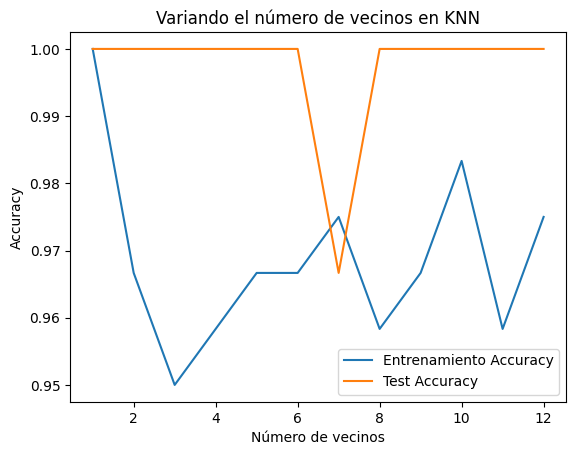

In [77]:
plt.title("Variando el número de vecinos en KNN")

# Plot training accuracies
plt.plot(neighbors, train_accuracies.values(), label="Entrenamiento Accuracy") 

# Plot test accuracies
plt.plot(neighbors, test_accuracies.values(), label="Test Accuracy") 

plt.legend()
plt.xlabel("Número de vecinos")
plt.ylabel("Accuracy")

# Display the plot
plt.show()

Fijándonos en los valores de test, vemos que en k pequeños el modelo parece sobreajustar y en k grandes vuelve a 1 y hay posibilidad de subajeste porque puede perder detalles, parece que con una k=7 el modelo tiene un equilibrio, con lo que puede lograr una buena generalizacion sin ser demasiado específico o demasiado general.